In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import json
import os


import pandas.plotting

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [96]:
bank_cleaned = pd.read_csv('bank_cleaned.csv', index_col=0)
pbank_cleaned = pd.read_csv('pbank_cleaned.csv', index_col=0)
nbank = pd.read_csv('nbank.csv',index_col=0)

In [97]:
bank_cleaned.head()

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,subscription,month_num
0,95,retired,married,secondary,0,0,0,1,oct,215,1,2613,0,2,0,10
1,95,retired,divorced,primary,2282,0,0,21,apr,207,17,2613,0,2,1,4
2,94,retired,divorced,secondary,1234,0,0,3,mar,212,1,2613,0,2,0,3
3,93,retired,married,unknown,775,0,0,4,aug,476,2,13,9,1,1,8
4,93,retired,married,unknown,775,0,0,22,jul,860,2,177,7,1,1,7


In [98]:
pbank_cleaned.head()

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,subscription,month_num
3,93,retired,married,unknown,775,0,0,4,aug,476,2,13,9,1,1,8
4,93,retired,married,unknown,775,0,0,22,jul,860,2,177,7,1,1,7
5,92,retired,married,unknown,775,0,0,26,jan,164,4,96,3,1,1,1
11,89,retired,divorced,primary,1323,0,0,29,dec,207,4,189,1,0,0,12
12,88,retired,married,secondary,433,0,0,15,sep,161,1,274,1,0,0,9


In [99]:
bank_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45210 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           45210 non-null  int64 
 1   job           45210 non-null  object
 2   marital       45210 non-null  object
 3   education     45210 non-null  object
 4   balance       45210 non-null  int64 
 5   housing       45210 non-null  int64 
 6   loan          45210 non-null  int64 
 7   day           45210 non-null  int64 
 8   month         45210 non-null  object
 9   duration      45210 non-null  int64 
 10  campaign      45210 non-null  int64 
 11  pdays         45210 non-null  int64 
 12  previous      45210 non-null  int64 
 13  poutcome      45210 non-null  int64 
 14  subscription  45210 non-null  int64 
 15  month_num     45210 non-null  int64 
dtypes: int64(12), object(4)
memory usage: 5.9+ MB


In [100]:
pbank_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8256 entries, 3 to 45208
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           8256 non-null   int64 
 1   job           8256 non-null   object
 2   marital       8256 non-null   object
 3   education     8256 non-null   object
 4   balance       8256 non-null   int64 
 5   housing       8256 non-null   int64 
 6   loan          8256 non-null   int64 
 7   day           8256 non-null   int64 
 8   month         8256 non-null   object
 9   duration      8256 non-null   int64 
 10  campaign      8256 non-null   int64 
 11  pdays         8256 non-null   int64 
 12  previous      8256 non-null   int64 
 13  poutcome      8256 non-null   int64 
 14  subscription  8256 non-null   int64 
 15  month_num     8256 non-null   int64 
dtypes: int64(12), object(4)
memory usage: 1.1+ MB


In [101]:
nbank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36954 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           36954 non-null  int64 
 1   job           36954 non-null  object
 2   marital       36954 non-null  object
 3   education     36954 non-null  object
 4   balance       36954 non-null  int64 
 5   housing       36954 non-null  int64 
 6   loan          36954 non-null  int64 
 7   day           36954 non-null  int64 
 8   month         36954 non-null  object
 9   duration      36954 non-null  int64 
 10  campaign      36954 non-null  int64 
 11  pdays         36954 non-null  int64 
 12  previous      36954 non-null  int64 
 13  poutcome      36954 non-null  int64 
 14  subscription  36954 non-null  int64 
 15  month_num     36954 non-null  int64 
dtypes: int64(12), object(4)
memory usage: 4.8+ MB


In [102]:
bank_cleaned['day'] = bank_cleaned['day'].astype(object)
bank_cleaned['month_num'] = bank_cleaned['month_num'].astype(object)

pbank_cleaned['day'] = pbank_cleaned['day'].astype(object)
pbank_cleaned['month_num'] = pbank_cleaned['month_num'].astype(object)

nbank['day'] = nbank['day'].astype(object)
nbank['month_num'] = nbank['month_num'].astype(object)

###  Numeric Features Against Subscription

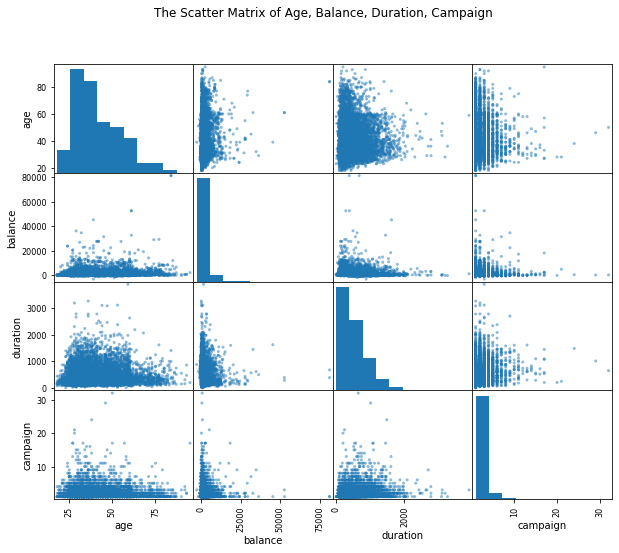

In [103]:
from pandas.plotting import scatter_matrix
matrix = bank_cleaned.loc[bank_cleaned.subscription == 1,['age','balance','duration','campaign']]

#matrix_plot = scatter_matrix(bank_cleaned[['age','balance','duration','campaign']],figsize=(10,8))
matrix_plot = scatter_matrix(matrix,figsize=(10,8))

plt.suptitle('The Scatter Matrix of Age, Balance, Duration, Campaign')
plt.show()

Key takeaways:
*age has the moderate positive correlation with duration and campaign;
*duration and campaign has moderate positive correlation;
*duration and balance, campaign and balance have mild positive correlation;


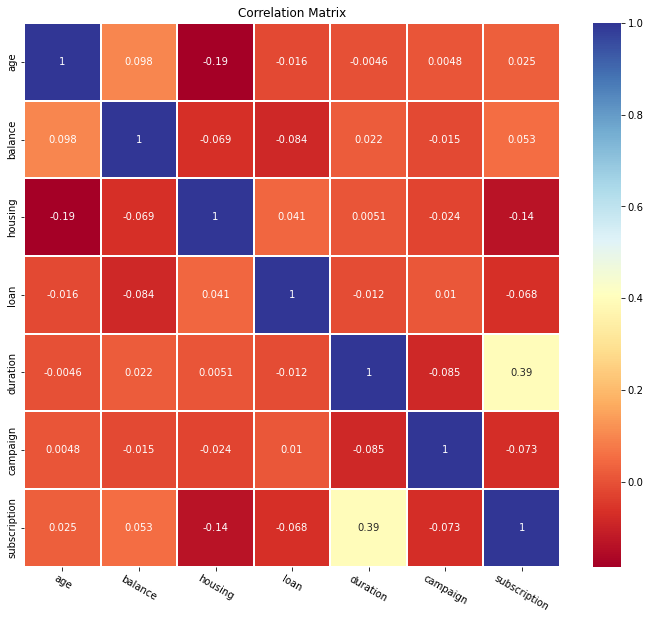

In [104]:
plt.subplots(figsize=(12,10))

corr_data = bank_cleaned[['age','balance','housing','loan','duration','campaign','subscription']]
corr = corr_data.corr()
sns.heatmap(corr,annot=True,cmap = 'RdYlBu', linewidths=0.2,annot_kws={'size':10});

fig=plt.gcf()

plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

Key takeaways: 
*subscription has strong positive correlation with duration, mild negative correlation with housing loan.

*Housing loan has mild negative correlatin with age. 


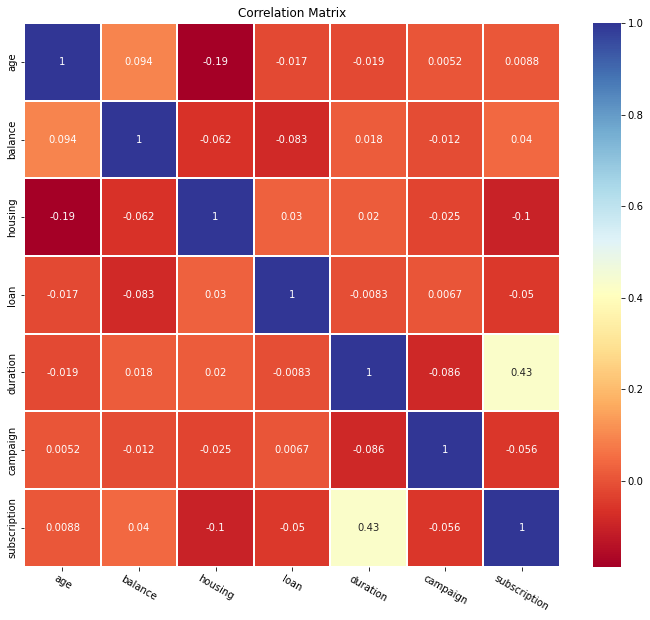

In [105]:
plt.subplots(figsize=(12,10))

corr_data = nbank[['age','balance','housing','loan','duration','campaign','subscription']]
corr = corr_data.corr()
sns.heatmap(corr,annot=True,cmap = 'RdYlBu', linewidths=0.2,annot_kws={'size':10});

fig=plt.gcf()

plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

Key takeaways: 
*subscription has strong positive correlation with duration, mild negative correlation with housing loan.

Housing loan has mild negative correlatin with age. 


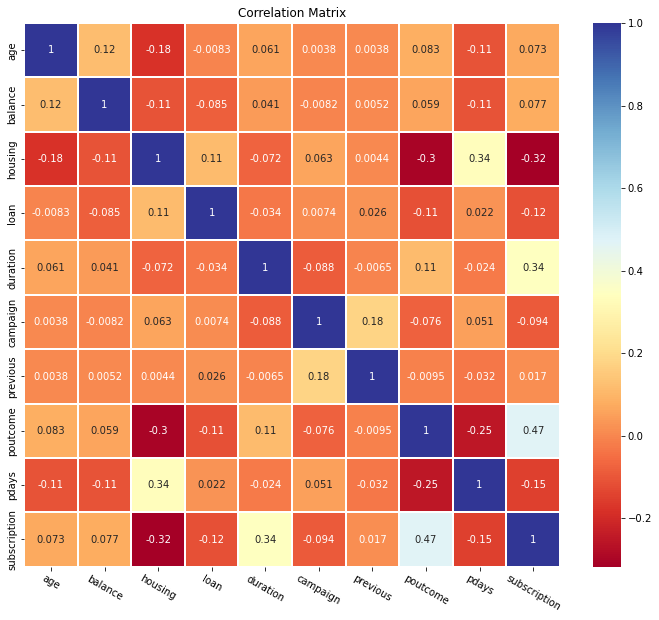

In [106]:
plt.subplots(figsize=(12,10))

corr_data = pbank_cleaned[['age','balance','housing','loan','duration','campaign','previous','poutcome','pdays','subscription']]
corr = corr_data.corr()
sns.heatmap(corr,annot=True,cmap = 'RdYlBu', linewidths=0.2,annot_kws={'size':10});

fig=plt.gcf()

plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

Key takeaways: 
*from the dataset of pbank, where people have been contacted in the last campaign, we find subscription has strong positive correlation with poutcome and duration. It has strong negative correlation with housing loan, mild negative correlation with personal loan and pdays.

pdays had strong positive correlation with housing loans, strong negative correlation wiht poutcome, mild negative correlation with age and balance.

poutcome has mild positive correlation with duration, mild negative correlation wiht personal loan, relative strong negative correlation with housing loans.

previous contacts has mild positive correlation with this campaign contacts.

personal loan has mild positive correlation with housingloan. 

housing loan has mild negative correlation with age and balance. 

balance has mild positive correlatin with age. 


### Categorical Features Against Subscription

### % subscribed by profession

In [107]:
job_subscription = pd.crosstab(bank_cleaned.job,bank_cleaned.subscription).apply(lambda row: row/row.sum(), axis=1)
#columns = [bank_cleaned.subscription, bank_cleaned.marital]
job_subscription

subscription,0,1
job,,
admin.,0.877973,0.122027
blue-collar,0.927250,0.072750
entrepreneur,0.917283,0.082717
housemaid,0.912097,0.087903
management,0.862430,0.137570
retired,0.772085,0.227915
self-employed,0.881571,0.118429
services,0.911170,0.088830
student,0.713220,0.286780


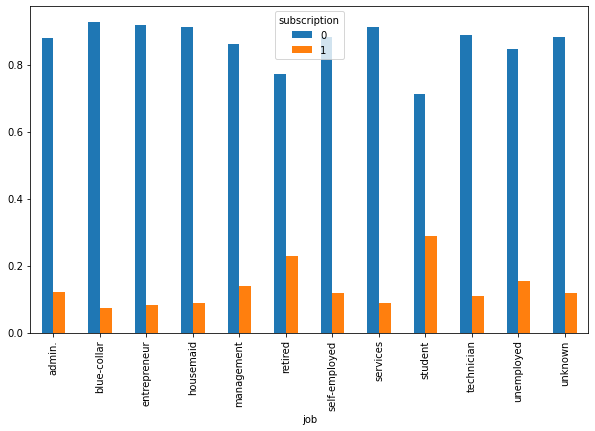

In [108]:
job_subscription.plot(kind = 'bar', figsize = (10,6))

plt.show()

key takeaway: student and retired people have a fairly high subscription rate. Blue collar has the lowest subscription rate. 

In [121]:
bank_cleaned['age'].describe()

count    45210.000000
mean        40.936231
std         10.618879
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [113]:
bins = [0, 30, 40, 50, 60,100]
category = ['<30', '30-40', '40-50','50-60','>60']

bank_cleaned['age_group'] = pd.cut(bank_cleaned['age'], bins, labels = category)
bank_cleaned['age_group'].value_counts()


30-40    17686
40-50    11239
50-60     8067
<30       7030
>60       1188
Name: age_group, dtype: int64

In [118]:
bank_cleaned['balance'].describe()

count     45210.000000
mean       1362.290179
std        3044.797065
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [120]:
bins = [-1000000000, 0, 500, 1500, 5000]
category = ['no_balance', 'low_balance', 'average_balance','high_balance']

bank_cleaned['balance_group'] = pd.cut(bank_cleaned['balance'], bins, labels = category)
bank_cleaned['balance_group'].value_counts()


low_balance        16385
average_balance    10650
high_balance        8050
no_balance          7280
Name: balance_group, dtype: int64

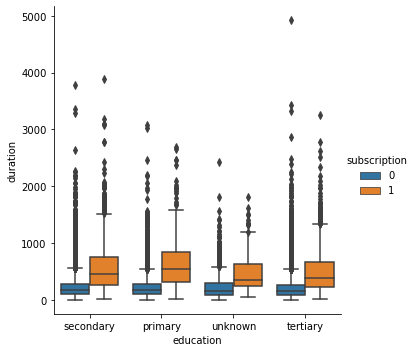

In [20]:
sns.catplot(data=bank_cleaned, x="education", y="duration", hue = 'subscription', kind = 'box')
plt.show()

ValueError: Invalid RGBA argument: nan

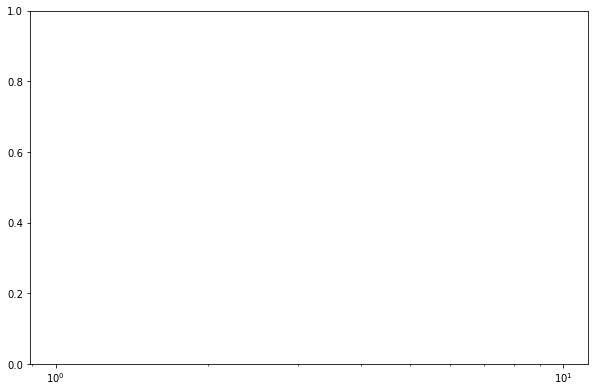

In [122]:

data = bank_cleaned[bank_cleaned.subscription == 1].sort_values('balance',ascending=False)
area = 5e-2*data.balance


edgecolor = data.education.map({'primary': 'skyblue','secondary': 'gold','tertiary': 'red'})
    
data.plot.scatter('balance','age',
                logx=True,
                s=area, vmin=55, vmax=100,
                linewidths=1, edgecolors=edgecolor, sharex=False,
                figsize=(10,6.5))

   
    
    
